First 5 rows of dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset shape: (150, 5)

========== Decision Tree Results ==========
Accuracy: 100.0 %
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.

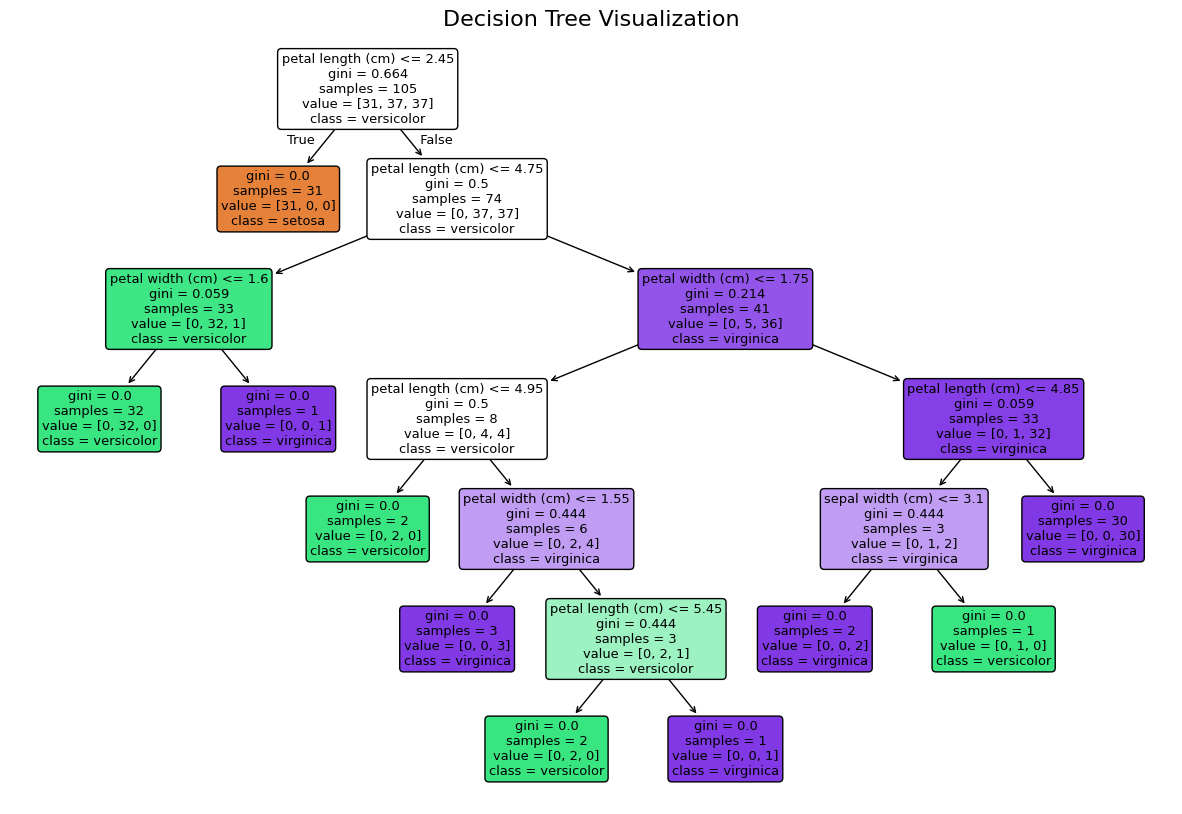

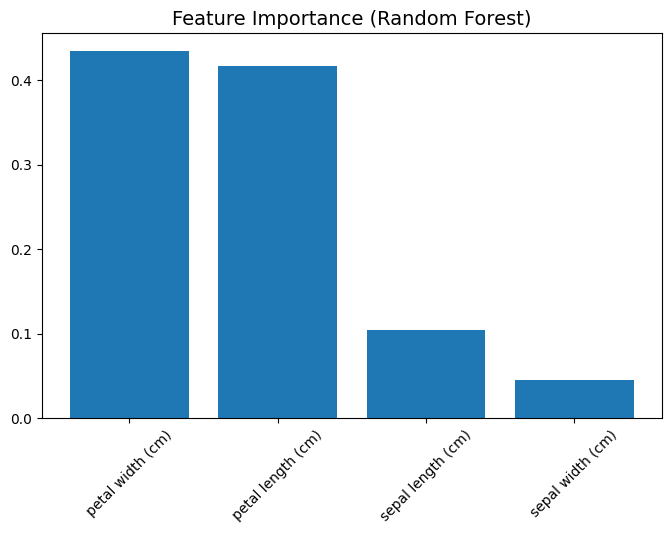

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris # Import load_iris

# Step 1: Load the dataset
# df = pd.read_csv("/content/Iris.csv") # Original line causing error

# Load the Iris dataset from scikit-learn
iris = load_iris()
X = iris.data
y = iris.target

# Convert to pandas DataFrame for consistency with original code structure
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = iris.target_names[y] # Add target names as 'Species' column

# Display first few rows and basic info
print("First 5 rows of dataset:\n", df.head())
print("\nDataset shape:", df.shape)

# Step 2: Drop unnecessary columns (like Id if present)
# The loaded dataset from scikit-learn doesn't have an 'Id' column, so this step is not strictly needed
# but kept for consistency with the original code structure if an Id column were ever present.
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Step 3: Separate features (X) and target (y)
# X and y are already separated after loading with load_iris(), but we'll redefine them
# based on the DataFrame for consistency with the rest of the code.
X = df.drop(columns=['Species'])
y = df['Species']


# Step 4: Split into training and testing data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 6: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 7: Evaluate both models
print("\n========== Decision Tree Results ==========")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt)*100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

print("\n========== Random Forest Results ==========")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(15,10))
# Use feature names and class names from the loaded iris dataset
tree.plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Step 9 (Optional): Feature Importance Plot (Random Forest)
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.show()

Iris Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

 Model Evaluation:
OOB Score Estimate: 0.9428571428571428
Accuracy on Test Set: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                    

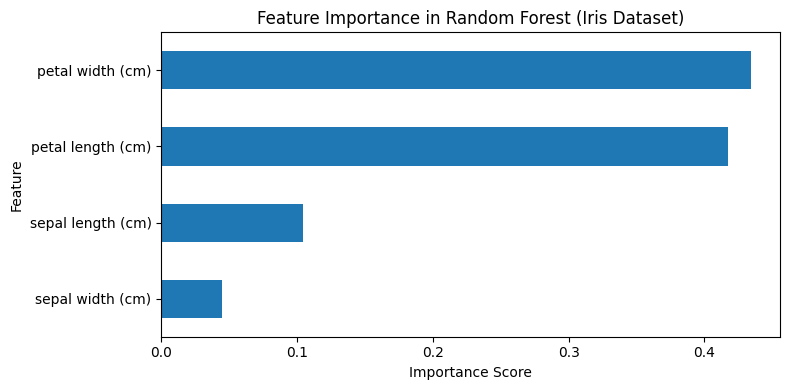


 Predicted class for [[5.1, 3.5, 1.4, 0.2]]: setosa


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target


df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})
print("Iris Dataset Sample:")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_features='sqrt',    # Number of features to consider per split
    oob_score=True,         # Use out-of-bag samples to estimate accuracy
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\n Model Evaluation:")
print("OOB Score Estimate:", rf.oob_score_)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_importances = pd.Series(rf.feature_importances_, index=iris.feature_names)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,4))
plt.title("Feature Importance in Random Forest (Iris Dataset)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

sample = [[5.1, 3.5, 1.4, 0.2]]  # Example input
predicted_class = rf.predict(sample)
print(f"\n Predicted class for {sample}: {iris.target_names[predicted_class][0]}")